In [1]:
# Load library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# Load dataset
df = pd.read_csv('credit_risk_dataset.csv')

In [3]:
# Menampilkan 5 data teratas
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
# Menampilkan informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32580 entries, 0 to 32579
Data columns (total 12 columns):
person_age                    32580 non-null int64
person_income                 32580 non-null int64
person_home_ownership         32580 non-null object
person_emp_length             32580 non-null float64
loan_intent                   32580 non-null object
loan_grade                    32580 non-null object
loan_amnt                     32580 non-null int64
loan_int_rate                 29464 non-null float64
loan_status                   32580 non-null int64
loan_percent_income           32580 non-null float64
cb_person_default_on_file     32580 non-null object
cb_person_cred_hist_length    32580 non-null int64
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
# Menampilkan statistik deskriptif dari dataset
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32580.000000,3.258000e+04,32580.000000,32580.000000,29464.000000,32580.000000,32580.000000,32580.000000
mean,27.731031,6.589271e+04,4.767772,9589.511971,11.011637,0.218171,0.170209,5.803622
std,6.315410,5.254702e+04,4.087238,6322.132541,3.240499,0.413010,0.106779,4.053669
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,2.039784e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


### 1. DATA CLEANING

**A) HANDLING OUTLIER**

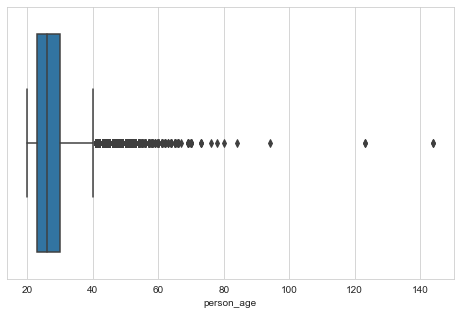

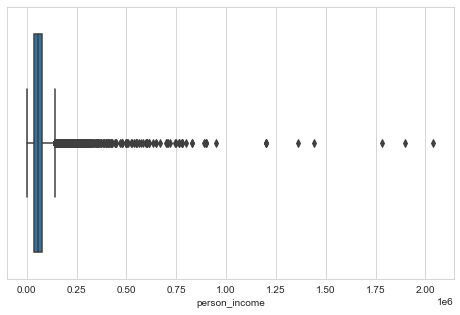

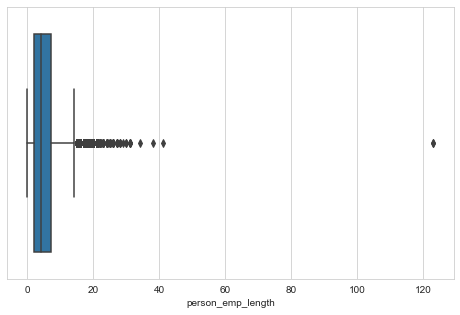

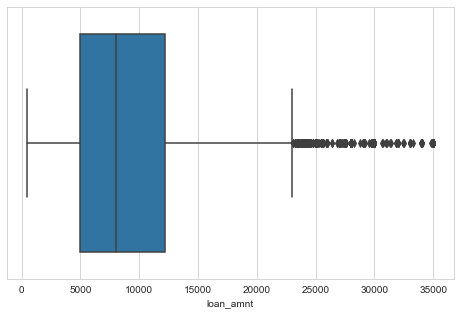

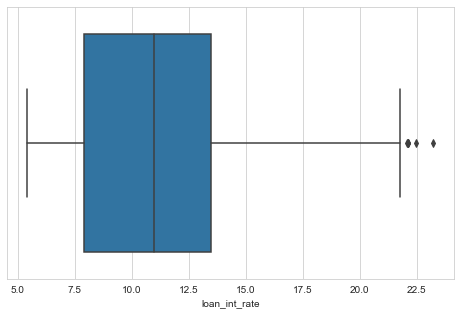

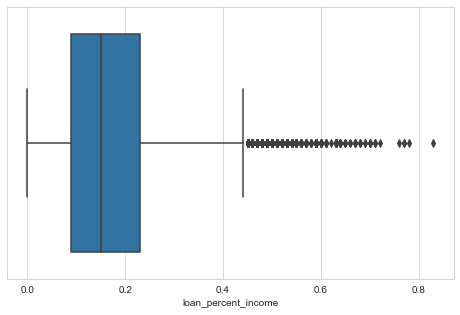

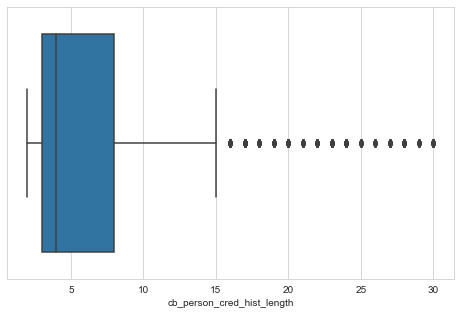

In [6]:
# Cek outlier menggunakan boxplot
columns = df.select_dtypes(exclude=['object'])
columns = columns.drop(['loan_status'], axis=1)
for i in columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(columns[i])

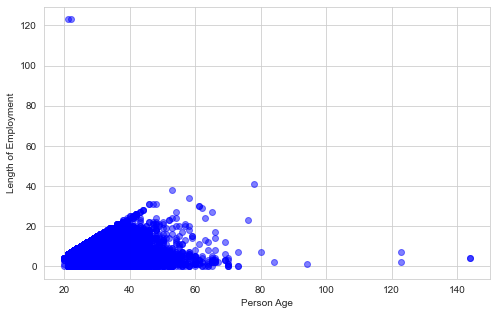

In [7]:
# Cek outlier pada feature person_age dan person_emp_length menggunakan scatterplot
plt.figure(figsize=(8,5))
plt.scatter(df['person_age'], df['person_emp_length'], c='blue', alpha=0.5)
plt.xlabel('Person Age')
plt.ylabel('Length of Employment')
plt.show()

Dilihat dari scatterplot diatas terdapat adanya outlier, karena ada data yang berumur 21 tahun tapi **length of employmentnya** lebih dari 120 tahun. Selain itu, ada data yang berumur 144 tahun.

In [8]:
# Data outlier person_age yang lebih dari 100 tahun
df[df['person_age']>=100]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4


In [9]:
# Data outlier person_emp_length yang lebih dari 100 tahun
df[df['person_emp_length']>=100]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4


In [10]:
# Jumlah data outlier pada feature person_age
age_outlier = df[df['person_age']>=100]['person_age']
age_outlier.value_counts().sum()

4

In [11]:
# Jumlah data outlier pada feature person_emp_length
age_outlier = df[df['person_emp_length']>=100]['person_emp_length']
age_outlier.value_counts().sum()

2

Karena jumlah outliernya hanya sedikit dari jumlah kesulurahan data, jadi opsi yang saya lakukan adalah drop.

In [12]:
# Drop outlier pada feature person_age
df = df.drop(df[df['person_age'] >= 100].index)

# Drop outlier pada feature person_emp_length
df = df.drop(df[df['person_emp_length'] >= 100].index)

**B) HANDLING MISSING VALUE**

In [13]:
# Cek missing value
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3115
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Missing value pada feature **loan interest rate** diisi menggunakan mean dari masing-masing grade pada feature **loan grade**, karena semakin baik nilai loan grade (A > B > C > D > E > F > G) maka akan semakin kecil interest rate-nya. Bisa dilihat pada pivot table dibawah ini:

In [14]:
# Membuat pivot table feature loan_grade dengan nilai mean loan_int_rate
table = pd.pivot_table(df, index=['loan_grade'], values=['loan_int_rate'], aggfunc='mean')
table['loan_int_rate'] = table['loan_int_rate'].round(decimals=2)
table

,loan_int_rate
loan_grade,
A,7.33
B,11.00
C,13.46
D,15.36
E,17.01
F,18.61
G,20.25


In [15]:
# Fill missing value
df['loan_int_rate'] = df['loan_int_rate'].mask(df['loan_grade'] == 'A', df['loan_int_rate'].fillna(7.33))
df['loan_int_rate'] = df['loan_int_rate'].mask(df['loan_grade'] == 'B', df['loan_int_rate'].fillna(11.00))
df['loan_int_rate'] = df['loan_int_rate'].mask(df['loan_grade'] == 'C', df['loan_int_rate'].fillna(13.46))
df['loan_int_rate'] = df['loan_int_rate'].mask(df['loan_grade'] == 'D', df['loan_int_rate'].fillna(15.36))
df['loan_int_rate'] = df['loan_int_rate'].mask(df['loan_grade'] == 'E', df['loan_int_rate'].fillna(17.01))
df['loan_int_rate'] = df['loan_int_rate'].mask(df['loan_grade'] == 'F', df['loan_int_rate'].fillna(18.26))
df['loan_int_rate'] = df['loan_int_rate'].mask(df['loan_grade'] == 'G', df['loan_int_rate'].fillna(20.25))

**C) ENCODE CATEGORICAL DATA**

Karena sebagian besar feature berupa categorical, maka dari itu feature yang berupa categorical tersebut harus diubah terlebih dahulu menjadi numerical agar bisa diproses oleh machine learning.

In [16]:
# Memisahkan columns numerical dengan columns categorical
df_num = df.select_dtypes(exclude=['object'])
df_cat = df.select_dtypes(include=['object'])

In [17]:
# One-hot encoding pada columns categorical 
df_cat_onehot = pd.get_dummies(df_cat)

In [18]:
# Concatenate
df_clean = pd.concat([df_num, df_cat_onehot], axis=1)

In [19]:
# Menampilkan data teratas
df_clean.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0,0.10,2,0,0,...,0,0,1,0,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,1,0.57,3,1,0,...,0,0,0,1,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,0,0,0,1,0,0,0,0,1,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,0,0,0,1,0,0,0,0,0,1
5,21,9900,2.0,2500,7.14,1,0.25,2,0,0,...,1,1,0,0,0,0,0,0,1,0


In [20]:
# Menampilkan informasi dari dataset
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32574 entries, 1 to 32579
Data columns (total 27 columns):
person_age                        32574 non-null int64
person_income                     32574 non-null int64
person_emp_length                 32574 non-null float64
loan_amnt                         32574 non-null int64
loan_int_rate                     32574 non-null float64
loan_status                       32574 non-null int64
loan_percent_income               32574 non-null float64
cb_person_cred_hist_length        32574 non-null int64
person_home_ownership_MORTGAGE    32574 non-null uint8
person_home_ownership_OTHER       32574 non-null uint8
person_home_ownership_OWN         32574 non-null uint8
person_home_ownership_RENT        32574 non-null uint8
loan_intent_DEBTCONSOLIDATION     32574 non-null uint8
loan_intent_EDUCATION             32574 non-null uint8
loan_intent_HOMEIMPROVEMENT       32574 non-null uint8
loan_intent_MEDICAL               32574 non-null uint8
loan_